In [56]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np

In [57]:
player_id = 8475170

In [58]:
resp = requests.get("https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=gameLog".format(player_id))
data = resp.json()
#print(json.dumps(data['stats'][0]['splits'], indent=2))

In [59]:
splits = pd.read_json(json.dumps(data['stats'][0]['splits']))
games = pd.DataFrame(list(splits['game']))
gamePks = games['gamePk']
stats = pd.DataFrame(list(splits['stat']))
goals = stats['goals']
assists = stats['assists']
dates = splits['date']
df = pd.DataFrame(data={'gamePk': gamePks, 'goals': goals, 'assists': assists, 'date': dates})

In [60]:
df = df.sort_values(by='date')

In [66]:
df['csgoals'] = df['goals'].cumsum()
df['csassists'] = df['assists'].cumsum()
df['cspoints'] = df['goals'].add(df['assists']).cumsum()

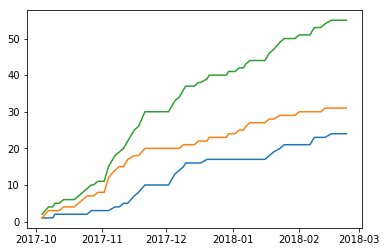

In [67]:
plt.plot(df['date'],df['csgoals'])
plt.plot(df['date'], df['csassists'])
plt.plot(df['date'], df['cspoints'])